Sep 2015, J. Slavič

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Objektno programiranje

Python omogoča tri tipe programiranja ([docs.python.org](https://docs.python.org/3/howto/functional.html)):

1. proceduralno: seznam instrukcij kaj je treba izvesti (npr.: ``C, Pascal``)
2. funkcijsko: reševanje problema z uporabo funkcij (npr.: ``Mathematica, C++, Php`` )
3. objektno: program bazira na objektih, ki imajo lastnosti, funkcije,... (npr.: ``C++, Java``)


Doslej smo spoznali proceduralno in funkcijsko programiranje. Sledi objektno orientirano programiranje, ki ponavadi temelji na **razredih** (*class*), objekti so pa **instance** (*instance*) razreda. Tukaj si bomo pogledali zgolj nekatere osnove objektnega programiranja (da boste lažje razumeli drugo kodo in jo prirejali).

Glejte [docs.python.org](https://docs.python.org/3.4/tutorial/classes.html) za podrobno pomoč.

Poglejmo si preprosti primer:

In [3]:
# proceduralno
a = 5
b = 5 * a

# funkcijsko
def zmnozi(a, b):
    return a*b

# objektno
class Studenti:
    def __init__(self, st_studentov = 1):
        self.st_studentov = st_studentov
        #print('kar nekaj')

In [4]:
razred_NM = Studenti(st_studentov=10)
razred_NM.st_studentov

10

In [5]:
class Pravokotnik:
    """Razred za objekt pravokotnik"""

    def __init__(self, sirina=1, visina=1): # to je konstruktor objekta. Se izvede, če kličemo Pravokotni(sirina=1, visina=4)
        self.sirina = sirina 
        self.visina = visina # visina je atribut objekta
        
    def povrsina(self):
        return self.sirina * self.visina
    
    def set_sirina(self, sirina=1):
        self.sirina = sirina

Bodite pozorni za zamik, ki definira celotni blok, ki pripada razredu. Spremenljivka ``self`` je referenca na sam razred (nekateri drugi programski jeziki tukaj uporabijo npr. ``this``).

Ustvarimo sedaj instanco objekta ``Pravokotnik``:

In [6]:
pravokotnik = Pravokotnik(sirina=5)

Vsi atributi so shranjeni v slovarju ``__dict__``:

In [7]:
pravokotnik.__dict__

{'sirina': 5, 'visina': 1}

Do atributov praviloma ne dostopamo preko ``__dict__``, ampak takole:

In [8]:
pravokotnik.sirina

5

Ali objekt ima določeni atribut preverimo z ukazom ``hasattr``:

In [9]:
hasattr(pravokotnik, 'sirina')

True

Pokličimo sedaj še metodo (funkcije v razredih dobijo ime metoda:)) objekta (seveda bi lahko imela tudi parametre):

In [10]:
pravokotnik.povrsina() #poskusite poklkcati brez oklepajev ()

5

In [11]:
pravokotnik.set_sirina(sirina=100)

In [12]:
pravokotnik.povrsina()

100

In [13]:
pravokotnik.visina

1

#### Dedovanje

Razredi se lahko dedujejo. Preprosti primer:

In [14]:
class Kvadrat(Pravokotnik):
    "Razred kvadrat"
    
    def __init__(self, sirina=1):
        self.sirina = sirina
        self.visina = sirina
        
    def set_sirina(self, sirina):
        self.sirina = sirina
        self.visina = sirina

In [15]:
kvadrat = Kvadrat(sirina=4)

In [16]:
kvadrat.povrsina()

16

In [17]:
kvadrat.set_sirina(5)

In [18]:
kvadrat.povrsina() # morali bi popraviti tudi to funkcijo

25

Za vajo si sedaj poglejmo kako raširimo en vgrajeni razred (npr. ``list``):

In [19]:
class Seznam(list):
        
    def narisi(self):
        plt.plot(self, 'r.', label='Dolgo besedilo')
        plt.legend()
        plt.ylim(-5, 5)

In [20]:
list()

[]

In [21]:
a = list([1,2,3])
a

[1, 2, 3]

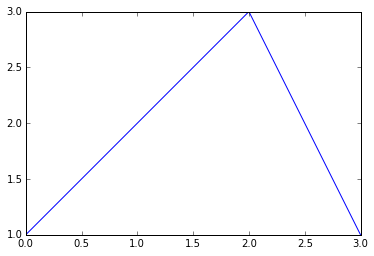

In [22]:
a.append(1)
plt.plot(a);

In [23]:
moj_seznam = Seznam([1, 2, 3])

In [24]:
moj_seznam

[1, 2, 3]

In [25]:
moj_seznam.append(1)

In [26]:
moj_seznam

[1, 2, 3, 1]

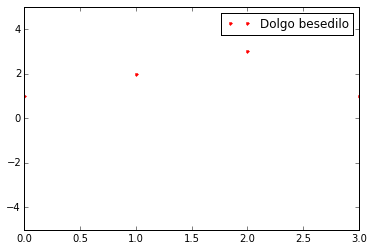

In [27]:
moj_seznam.narisi()

# Simbolično računanje s ``SymPy``

To predavanje temelji na virih:
* J.R. Johansson [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures) in
* [SymPy](http://sympy.org/en/index.html) - uradna dokumentacija modula.

``SymPy`` je eden od sistemov za strojno algebro (*computer Algebra Systems*), ki pa ima poleg zmogljivosti tudi to prednost, da je v celoti napisan v Pythonu. Alternativa bi lahko bila npr. [Sage](http://www.sagemath.org/).

Nekatera namenska komercialna orodja:
* [Mathematica](http://www.wolfram.com/mathematica) 
* [Maple](http://www.maplesoft.com/products/maple) 

Najprej uvozimo celotni modul ``SymPy``. Tukaj bomo naredili izjemo in uvozili celotni modul z \* (temu se praviloma izogibamo, saj zavzamemo veliko imenskega prostora).

In [28]:
from sympy import *

Zato, da dobimo lepo oblikovan $\LaTeX$ izpis uporabimo:

In [29]:
init_printing()

## Definiranje spremenljivk

Spremenljivke definiramo takole:

In [30]:
x, y, k = symbols('x y k')

In [31]:
x**y

Primer simboličnega izračuna:

In [32]:
sin(1.2*pi + x)**2

In [33]:
sin(pi + x)**2

Če želimo, lahko izraz priredimo spremenljivki:

In [34]:
f = sin(k*x)

Če želimo zapisati enačbo, to naredimo takole:

In [35]:
en = Eq(sin(k*x),0.5)
en

Spremenljivke lahko definiramo tudi tako:

In [36]:
a, b, c = symbols('a b c')# ali tudi: symbols('a', 'b', 'c')

In [37]:
type(a)

sympy.core.symbol.Symbol

Pri definiranju spremenljivk lahko dodajamo predpostavke:

In [38]:
x = Symbol('x', prime=True, positive=True)

In [39]:
x.is_prime

True

In [40]:
x.is_positive

True

In [41]:
x < 0

In [42]:
c = symbols('c', positive=True)

In [43]:
c<0

In [44]:
c.assumptions0

{'commutative': True,
 'complex': True,
 'hermitian': True,
 'imaginary': False,
 'negative': False,
 'nonnegative': True,
 'nonpositive': False,
 'nonzero': True,
 'positive': True,
 'real': True,
 'zero': False}

## Kompleksna število

Imaginarno število se zapiše z ``I``: 

In [45]:
1+1*I

In [46]:
I**2

In [47]:
(x * I + 1)**2

## Racionalna števila

``SymPy`` pozna tri numerične tipe: ``Real``, ``Rational``, ``Integer``: 

In [48]:
r1 = Rational(4, 5)
r2 = Rational(5, 4)

In [49]:
r1

In [50]:
r1+r2

In [51]:
r1/r2

## Numerični izračun

SymPy uporablja nekatere konstante, npr: ``pi``, ``E`` in ``oo`` za neskončnost.

Če želimo za določeni izraz izračunati numerično vrednost, potem uporabmo funkcijo ``evalf`` ali ``N``, ki imata argument ``n`` (število decimalnih mest).

In [52]:
N(pi,10)

In [53]:
pi.evalf(n=30)

In [54]:
y = symbols('y')

In [55]:
f = (x**y + pi)**2
f

In [56]:
N(f, 5) # enako kot evalf

Za simbole lahko uporabimo tudi numerične vrednosti, to naredimo s funkcijo ``subs``:

In [57]:
f.subs(x, 1.5)

V ``subs`` funkciji lahko uporabimo tudi slovar ali terko:

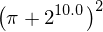

In [58]:
f.subs({x: 2, y: 10.})

In [59]:
N(f.subs({x: 1.5, y: 2}))

In [60]:
f.subs([(x, 1.5)])

Funkcija ``subs`` je lahko seveda drugi simbol ali izraz:

In [61]:
f.subs(x, y + oo)

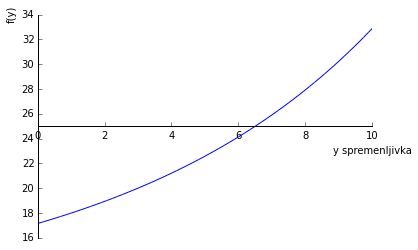

In [62]:
plot(f.subs(x, 1.1), (y, 0, 10), xlabel='y spremenljivka')

### ``SymPy`` in ``NumPy``

In [63]:
import numpy as np

In [64]:
x_vec = np.arange(0, 10, 0.1)

In [65]:
#%%timeit
y_vec = np.array([N(((x + pi)**2).subs(x, _)) for _ in x_vec])

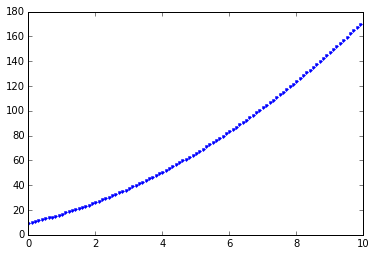

In [66]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec, 'b.');

#### Uporaba ``lambdify`` funkcije

Zgornji način je relativno počasen. Bistveno hitrejši je uporaba pristopa ``lambdify`` kjer se pripravi prevedena funkcija:

In [67]:
f_hitra = lambdify([x], (x + pi)**2, 'numpy')

In [68]:
%%timeit
y_vec = f_hitra(x_vec)
#y_vec[:10]

The slowest run took 10.72 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.11 µs per loop


# Grafični prikaz

``SymPy`` ima na ``matplotlib`` temelječo prikaz podatkov. Prikaz je sicer glede na ``matplotlib`` bolj omejen in ga uporabljamo za preproste prikaze (sicer pa ``numpy``).

Pomoč je tukaj: http://docs.sympy.org/latest/modules/plotting.html

Primer:

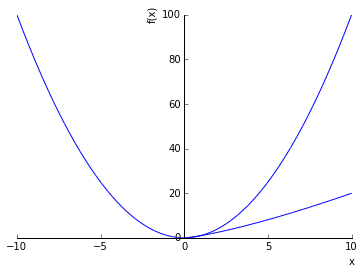

In [69]:
plot(x**2, x**1.3);

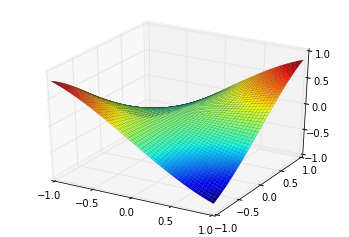

In [70]:
plotting.plot3d(sin(x*y), (x, -1, 1), (y, -1, 1));

# Algebra

V tem poglavju si bomo pogledali nekatere osnove uporabe ``SymPy`` za algebrajske operacije.

## Uporaba ``expand`` in ``factor``

Definirajmo matematični izraz:

In [71]:
f = (x+1)*(x+2)*(x+3)
f

in ga sedaj **razčlenimo** (*expand*):

In [72]:
aa = expand(f)
aa

Če želimo sedaj pogledati konstanto pred ``x``, naredimo to s funkcijo ``coeff``:

In [73]:
aa.coeff(x)

Argumenti funkcije definirajo kakšno razširitev želimo (glejte help!). Če želimo npr. trigonometrično razširitev, potem uporabimo ``trig=True``:

In [74]:
expand(sin(a+b))

In [75]:
expand(sin(a+b), trig=True)

Obratna operacija od razčlenitve je **razcepitev** (*factor*): 

In [76]:
factor(x**3 + 6 * x**2 + 11*x + 6)

Če nas zanimajo posamezni členi, potem to naredimo takole:

In [77]:
factor_list(x**3 + 6 * x**2 + 11*x + 6)

## Poenostavljanje izrazov s ``simplify``

Funkcija ``simplify`` poskuša poenostaviti izraze v bolj preproste (npr. s krajšanjem spremenljivk). Za posebne namene lahko poenostavimo tudi z: ``trigsimp``, ``powsimp``, ``logcombine``, in podobno. 

Več tukaj: http://docs.sympy.org/latest/tutorial/simplification.html

In [78]:
simplify((x+1)*(x+1)*(x+3))

In [79]:
simplify(sin(a)**2 + cos(a)**2)

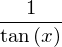

In [80]:
simplify(cos(x)/sin(x))

## Uporaba ``apart`` in ``together``

Funkciji uporabljamo za delo z ulomki:

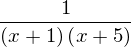

In [81]:
f1 = 1/((1 + x) * (5 + x))
f1

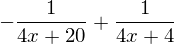

In [82]:
f2 = apart(f1, x)
f2

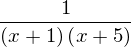

In [83]:
together(f2)

V tem primeru pridemo do podobnega rezultata s ``simplify``:

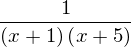

In [84]:
simplify(f2)

# Odvajanje

Odvajanje je načeloma relativno preprosta matematična operacija, ki jo izvedemo s funkcijo ``diff``. Prvi argument je funkcija, ki jo odvajamo po drugem argumentu:

In [85]:
x, y, z = symbols('x y z')
f = sin(x*y) + cos(y*z)
diff(f, x)

Odvodi višjega reda:

In [86]:
diff(f, x, x, x)

Drugačna oblika zgornjega odvoda:

In [87]:
diff(f, x, 3)

Odvod po več spremenljivkah $\frac{d^3f}{dx\,dy^2}$ izvedemo takole:

In [88]:
diff(f, x, 1, y, 2)

# Integriranje

Integriranje izvajamo s funkcijo ``integrate``, ki v primeru nedoločenega integriranja sprejme dva argumenta: funkcijo in spremenljivke po kateri integriramo:

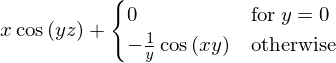

In [89]:
integrate(f, x)

Določeno integriranje izvedemo z definiranjem integracijskih mej:

In [90]:
integrate(f, (x, -1, 1))

V kolikor so meje v neskončnosti, integriramo z vgrajeno konstanto za neskončnost ``oo``:

In [91]:
integrate(exp(-x**2), (x, -oo, oo))

# Vsota in produkt vrste

Vsoto vrste definiramo s pomočju funkcije ``Sum`` (velika črka, ker je ``sum`` že rezervirana v paketu ``numpy``):

In [92]:
n = Symbol("n")

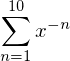

In [93]:
#f = Sum(1/x**n, (n, 1, oo))
f = Sum(1/x**n, (n, 1, 10))
f

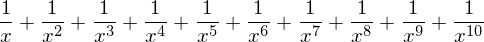

In [94]:
f.doit()

In [95]:
f.subs({x: 3}).evalf()

Produkt vrste definiramo podobno s funkcijo ``Product``:

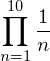

In [96]:
f = Product(1/n, (n, 1, 10))
f

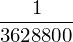

In [97]:
f.doit()

# Limitni račun

Limite računamo s pomočjo funkcije ``limit``: 

In [98]:
limit(sin(x)/x, x, 0)

Poglejmo kako lahko s funkcijo ``limit`` preverimo rezultat odvajanja s funkcijo ``diff``.

Za funkcijo:

In [99]:
f = sin(x*y) + cos(y*z)
diff(f, x)

mora veljati $\frac{\mathrm{d}f}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$. Preverimo, če res:

In [100]:
h = Symbol("h")

In [101]:
limit((f.subs(x, x+h) - f)/h, h, 0)

# Taylorjeve vrste

Taylorjeve vrste se izračunjo s pomočjo funkcijo ``series``:

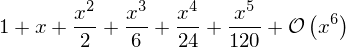

In [102]:
series(exp(x), x) # privzete vrednosti x0=0, in n=6

Če želimo definirati drugo izhodišče ($x0=2$) in z več členi ($n=8$), to izvedemo takole:

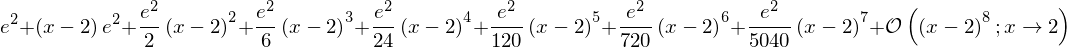

In [103]:
series(exp(x), x, x0=2, n=8)

Rezultat vklučuje tudi red veljavnosti; na tak način lahko kontroliramo veljavnosti izvajanja. Primer:

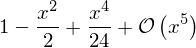

In [104]:
s1 = cos(x).series(x, 0, 5)
s1

In [105]:
s2 = sin(x).series(x, 0, 2)
s2

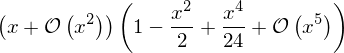

In [106]:
s1 * s2

Ugotovimo, da členi stopnje 2 in več niso smiselni:

In [107]:
s3 = simplify(s1 * s2)

Podatek o stopnji veljavnosti lahko odstranimo:

In [108]:
s3.removeO()

# Linearna algebra

## Matrike in vektorji

Matrike in vektorje definiramo s funkcjo ``Matrix``:

In [109]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

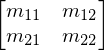

In [110]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [111]:
b = Matrix([[b1], [b2]])
b

Tipične operacije:

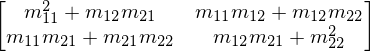

In [112]:
A**2

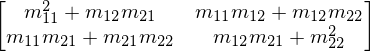

In [113]:
A*A

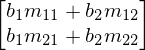

In [114]:
A * b

Ker uporabljamo *matrični* zapis, moramo paziti na stolpične in vrstične vektorje (spomnimo se: pri ``numpy`` uporabljamo sezname in nam na to ni potrebno paziti)

In [115]:
b.T*b

Determinanta, inverz:

In [116]:
A.det()

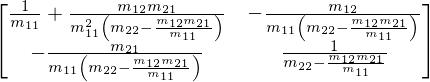

In [117]:
A.inv()

# Reševanje enačb

Enačbe in sistem enačb rešujemo s funkcijo ``solve``:

In [118]:
en = Eq(sin(x**2), 1/2)
en

In [119]:
solve(en, x)

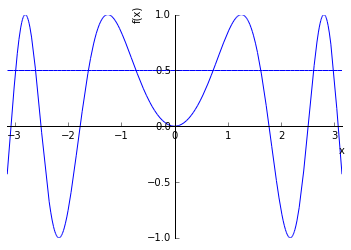

In [120]:
plot(sin(x**2), 0.5, (x, -pi, pi));

Gre za nelinearno enačbo z več rešitvami. Rešitev lahko iščemo tudi numerično v izbrani okolici:

In [121]:
sol = nsolve(en, x, 3)
#N(sol,10)
N(sol)

Kvadratna enačba

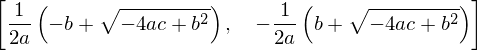

In [122]:
a, b, c = symbols(('a', 'b', 'c'))
solve(a*x**2 + b*x + c, x)

Sistem enačb

In [123]:
x, y = symbols('x y')
solve([x + y - 1, x - y - 1], [x, y])

# Reševanje diferencialnih enačb

Preprost primer na površini s koeficientom trenja $\mu$ drseče mase $m$. Začetna hitrost je $v_0$.

Definirajmo simbole:

In [124]:
x = symbols('x') # ali lahko tudi x = Function('x')
t, m, mu, g, v0 = symbols('t m mu g v0', real=True, positive=True)

Definirajmo diferencialno enačbo:

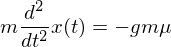

In [125]:
eq = Eq(m*x(t).diff(t,2), -mu*g*m)
eq

Nekaj lastnosti:

In [126]:
ode_order(eq, x(t))

In [127]:
classify_ode(eq)

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

Rešitev:

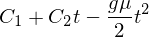

In [128]:
x_r=dsolve(eq, x(t)).args[1]
x_r

Začetni pogoji:

In [129]:
C1 = solve(Eq(x_r.subs(t,0),0), 'C1')[0]

In [130]:
C2 = solve(Eq(x_r.diff(t).subs(t,0),v0), 'C2')[0]

In [131]:
C1, C2

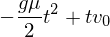

In [132]:
x_r = x_r.subs('C1', C1).subs('C2', C2)
x_r

Vstavimo podatke:

In [133]:
x_p = x_r.subs(g, 9.81).subs(mu, 0.1).subs(v0, 1)
x_p

In prikažemo:

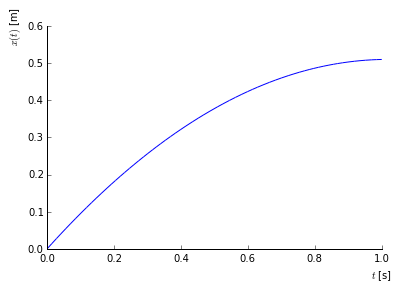

In [134]:
plot(x_p, (t, 0, 1), xlabel='$t$ [s]', ylabel='$x(t)$ [m]');

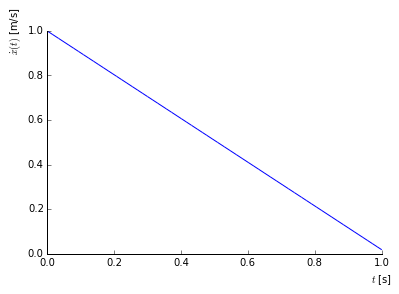

In [135]:
plot(x_p.diff(t), (t, 0, 1), xlabel='$t$ [s]', ylabel='$\dot{x}(t)$ [m/s]');

# Do naslednjih vaj preštudirajte sledeče:

1. Pojasnite na primeru *proceduralno* in *funkcijsko* programiranje.
* Definirajte preprosti objekt, naredite nekaj funkcij temu objektu.
* Definirajte objekt, ki ima argument ``data`` tipa ``np.array``. Pri kreiranju instance na bo potrebno podati dolžino seznama.
* Objektu iz prejšnje točke naj pri inicializacii priredi argumentu ``data`` priredi naključni seznam ustrezne dolžine (glejte funkcijo ``np.random.rand``).
* Objektu iz prejšnje točke dodajte metodo za zapis vrednosti v datoteko s pomočjo funkcije ``np.savetxt``.
* Isto kakor prejšnja točka, vendar naj se podatki shranijo v binarni obliki s pomočjo modula ``pickle``
* Dodajte metodo za branje iz datoteke (s pomočjo ``np.genfromtxt``).
* Uvozite ves naslovni prostor iz ``SymPy``. Nastavite lep izpis rezultatov.
* Za trikotnik na sliki definirajte funkcijo za izračun površine in volumna.
<img src="./fig/trikotnik.png" width=300>

* Izračunajte številčne vrednosti (podatki naj bodo definirani v slovarju in si jih izmislite).
* Izračunajte statični moment ploskve $S_{xx}=\int_A y\,dA=\int_{0}^{b} y\,x(y)\,dy$, kjer je $x(y)=a-b\,y/b$.
* Izračunajte vztrajnostni moment ploskve $I_{xx}=\int_A y^2\,dA$.
* Prikažite $I_{xx}$ v odvisnosti od parametra $b$ ($a$ definirate poljubno)
* Nedoločeno in določeno (v mejah od 0 do $\tau$) integrirajte izraz: $\sin(5+t)+e^t$.
* Z odvajanjem pokažite pravilnost nedoločenega integrala iz predhodnega koraka.
* Za kotaleči valj (polmer $r$, masa $m$) povežite translatorno $x$ prostost z rotacijsko $\varphi$. Pozneje boste vse izrazili s slednjo.
* Določite translatorno kinetično energijo težišča (definirajte s hitrostjo $\dot x$, zaradi predhodne povezave, pa bi naj bil rezultat s $\dot{\varphi}$)
* Določite še masni vztrajnostni moment valja in rotacijsko kinetično energijo. Obe kinetični energiji seštejte in izraz poenostavite (če je potrebno).
* Če na valj deluje moment $-M$, definirajte mehansko energijo: $E_m=-M\,\varphi$ in določite gibalno enačbo iz spremembe mehanske energije: $\frac{d E_m}{d t}=\frac{d E_k}{d t}$
* Nadaljujete na predhodni enačbi: poiščete ``sympy`` funkcijo ``replace`` in ugotovite razliko z ``subs``. Poskusite s pomočjo ``replace`` $\dot{\varphi}$ na obeh straneh enačbe spremeniti v 1.
* Najdite rešitev za predhodno pridobljeno diferencialno enačbo.
* Izmislite se začetne pogoje in jih uporabite na predhodno rešeni diferencialni enačbi. Izmislite si še preostale podatke ter prikažite rezultat.
* Določite čas, ko je zasuk $\varphi$ spet enak začetnemu (če ste predpostavili začetni zasuk nič, potem torej iščete $\varphi=0$. Določite tudi čas, ko je kotna hitrost $\dot{\varphi}$ enaka nič.

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 4 - polovica.ipynb).

# Ekstra

* ``sympy.mechanics``: ``sympy`` ima vgrajeno podporo za simuliranje sistema teles. Glejte tole predstavitev: http://pyvideo.org/video/2006/dynamics-with-sympy-mechanics-scipy-2013-present (tukaj je v predstavitvi prikazan primer: http://www.moorepants.info/blog/npendulum.html) 